In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Se importan las librerias necesarias para aplicar las funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Lectura del dataset que contiene los datos 
df= pd.read_parquet('/content/drive/MyDrive/ML Projects/train.parquet', engine= 'pyarrow') #train

##Completando datos nulos

In [4]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

### Laundry_Options

In [ ]:
#Vamos a reemplazar los valores nulos de laundry por la moda segun el tipo de unidad , para el caso de que existan 2 elegimos una sola.
df.groupby(['type'])['laundry_options'].agg(pd.Series.mode)

type
apartment                             w/d in unit
assisted living    [laundry on site, w/d in unit]
condo                                 w/d in unit
cottage/cabin                         w/d in unit
duplex                                w/d hookups
flat                                  w/d in unit
house                                 w/d hookups
in-law                                w/d in unit
land               [laundry on site, w/d in unit]
loft                                  w/d in unit
manufactured                          w/d hookups
townhouse                             w/d in unit
Name: laundry_options, dtype: object

In [5]:
df.fillna({'type': 'apartment', 'laundry_options': 'w/d in unit'}, inplace=True)
df.fillna({'type': 'assisted living', 'laundry_options': 'laundry on site'}, inplace=True)
df.fillna({'type': 'condo', 'laundry_options': 'w/d in unit'}, inplace=True)
df.fillna({'type': 'cottage/cabin', 'laundry_options': ' w/d in unit'}, inplace=True)
df.fillna({'type': 'duplex', 'laundry_options': 'w/d hookups'}, inplace=True)
df.fillna({'type': 'flat', 'laundry_options': ' w/d in unit'}, inplace=True)
df.fillna({'type': 'house ', 'laundry_options': 'w/d hookups'}, inplace=True)
df.fillna({'type': 'in-law', 'laundry_options': ' w/d in unit'}, inplace=True)
df.fillna({'type': 'land', 'laundry_options': 'laundry on site'}, inplace=True)
df.fillna({'type': 'loft', 'laundry_options': 'w/d in unit'}, inplace=True)
df.fillna({'type': 'manufactured', 'laundry_options': 'w/d hookups'}, inplace=True)
df.fillna({'type': 'townhouse', 'laundry_options': ' w/d in unit'}, inplace=True)

### Parking_options

In [6]:
#Vamos a reemplazar los valores nulos de laundry por la moda segun el tipo de unidad , para el caso de que existan 2 elegimos una sola.
df.groupby(['type'])['parking_options'].agg(pd.Series.mode)

type
apartment          off-street parking
assisted living    off-street parking
condo              off-street parking
cottage/cabin      off-street parking
duplex             off-street parking
flat               off-street parking
house                 attached garage
in-law             off-street parking
land               off-street parking
loft               off-street parking
manufactured       off-street parking
townhouse          off-street parking
Name: parking_options, dtype: object

In [7]:
df.fillna({'type': 'apartment', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'assisted living', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'condo', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'cottage/cabin', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'duplex', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'flat', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'house ', 'parking_options': 'attached garage'}, inplace=True)
df.fillna({'type': 'in-law', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'land', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'loft', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'manufactured', 'parking_options': 'off-street parking'}, inplace=True)
df.fillna({'type': 'townhouse', 'parking_options': 'off-street parking'}, inplace=True)

### Latitud y Longitud

In [9]:
# Decidimos completar los valores de Latitud y Longitud
from sklearn.impute import KNNImputer

# Crea un objeto KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Aplica la interpolación a las columnas 'lat' y 'long'
df[['lat', 'long']] = imputer.fit_transform(df[['lat', 'long']])

In [10]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                2
lat                        0
long                       0
state                      0
dtype: int64

##Columnas

In [11]:
#Eliminamos las columnas por no representar información relevante para el modelo.  
df.drop(['id','url','region_url', 'image_url'], inplace=True, axis= 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346477 entries, 0 to 346478
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   346477 non-null  object 
 1   price                    346477 non-null  int64  
 2   type                     346477 non-null  object 
 3   sqfeet                   346477 non-null  int64  
 4   beds                     346477 non-null  int64  
 5   baths                    346477 non-null  float64
 6   cats_allowed             346477 non-null  int64  
 7   dogs_allowed             346477 non-null  int64  
 8   smoking_allowed          346477 non-null  int64  
 9   wheelchair_access        346477 non-null  int64  
 10  electric_vehicle_charge  346477 non-null  int64  
 11  comes_furnished          346477 non-null  int64  
 12  laundry_options          346477 non-null  object 
 13  parking_options          346477 non-null  object 
 14  desc

In [12]:
#Consideramos un error de tipeo a los números decimales , razon por la cual modificamos el tipo de dato a entero
df['baths'] = df['baths'].astype('int64')

##Filas

In [13]:
#Eliminamos el outlier de land

df.drop(df[df['price']==35000].index, inplace = True)

In [14]:
#Eliminamos los duplicados que solamente cumplan con la igualdad en determinadas columnas
df.drop_duplicates(subset=['description'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273134 entries, 0 to 346478
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   273134 non-null  object 
 1   price                    273134 non-null  int64  
 2   type                     273134 non-null  object 
 3   sqfeet                   273134 non-null  int64  
 4   beds                     273134 non-null  int64  
 5   baths                    273134 non-null  int64  
 6   cats_allowed             273134 non-null  int64  
 7   dogs_allowed             273134 non-null  int64  
 8   smoking_allowed          273134 non-null  int64  
 9   wheelchair_access        273134 non-null  int64  
 10  electric_vehicle_charge  273134 non-null  int64  
 11  comes_furnished          273134 non-null  int64  
 12  laundry_options          273134 non-null  object 
 13  parking_options          273134 non-null  object 
 14  desc

## Variable Objetivo

In [15]:
#Agrego la columna 'low' con 1 para los precios menores a 999 usd y 0 para los superiores

def conversion (x):
    if x <= 999:
        return 1
    else:
        return 0

df['low'] = df['price'].apply(lambda x: conversion(x))

In [16]:
#Eliminamos la columna price para que no interfiera con el modelo
df.drop(['price' ], inplace=True, axis= 1)

## Variables Categoricas 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273134 entries, 0 to 346478
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   273134 non-null  object 
 1   type                     273134 non-null  object 
 2   sqfeet                   273134 non-null  int64  
 3   beds                     273134 non-null  int64  
 4   baths                    273134 non-null  int64  
 5   cats_allowed             273134 non-null  int64  
 6   dogs_allowed             273134 non-null  int64  
 7   smoking_allowed          273134 non-null  int64  
 8   wheelchair_access        273134 non-null  int64  
 9   electric_vehicle_charge  273134 non-null  int64  
 10  comes_furnished          273134 non-null  int64  
 11  laundry_options          273134 non-null  object 
 12  parking_options          273134 non-null  object 
 13  description              273134 non-null  object 
 14  lat 

In [17]:
#Eliminamos las columnas de variables categoricas que no usaremos  
df.drop(['region','description', 'state'], inplace=True, axis= 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254990 entries, 0 to 346478
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     254990 non-null  object 
 1   sqfeet                   254990 non-null  int64  
 2   beds                     254990 non-null  int64  
 3   baths                    254990 non-null  int64  
 4   cats_allowed             254990 non-null  int64  
 5   dogs_allowed             254990 non-null  int64  
 6   smoking_allowed          254990 non-null  int64  
 7   wheelchair_access        254990 non-null  int64  
 8   electric_vehicle_charge  254990 non-null  int64  
 9   comes_furnished          254990 non-null  int64  
 10  laundry_options          254990 non-null  object 
 11  parking_options          254990 non-null  object 
 12  lat                      254990 non-null  float64
 13  long                     254990 non-null  float64
 14  low 

Visualizamos las relaciones de las variables numéricas del dataset con nuestra variable objetivo

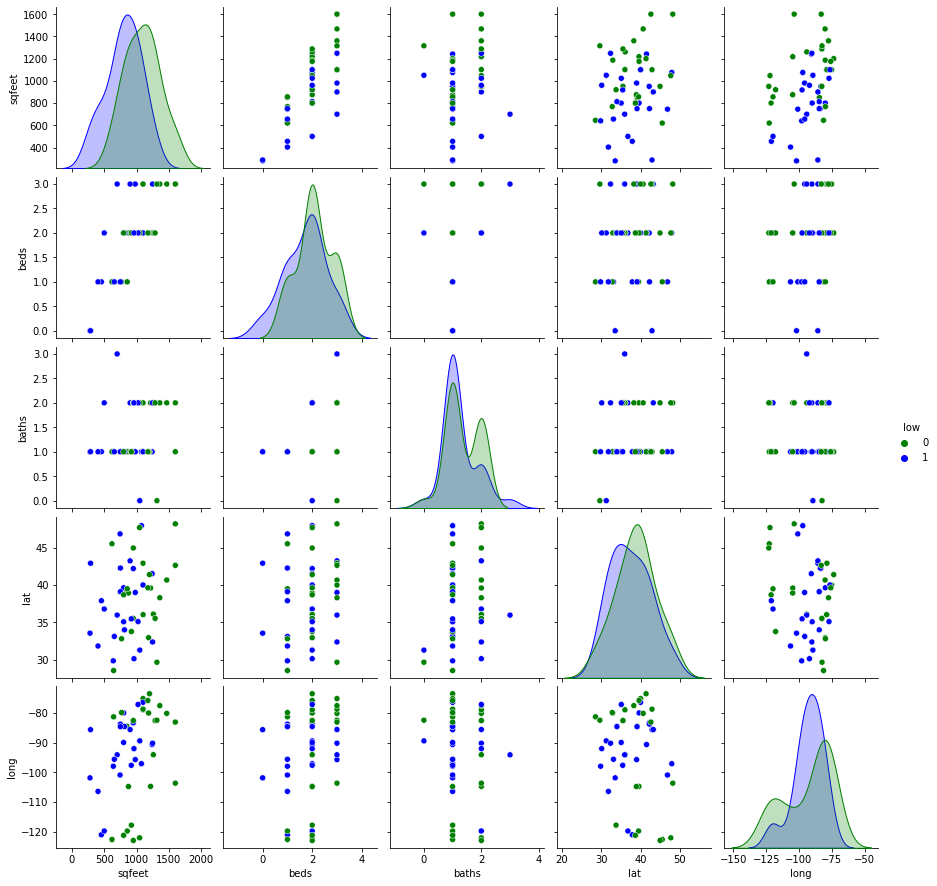

In [18]:
sns.pairplot(df[['sqfeet', 'beds', 'baths', 'lat', 'long', 'low']].sample(50), hue="low", palette = ['g', 'b'])
plt.show()

##Dataset Final

In [20]:
df.to_csv('df_train_final.csv')